In [3]:
from torchtext.vocab import Vectors

In [4]:


countries = ['china', 'sweden', 'finland', 'japan', 'vietnam']
vehicles = ["car", "bike", "bus", "boat", "ferry"]

adjectives = ["terrified", "astonished", "saddened", "hopeless", "terrifible"]
verbs = ["run", "walk", "speak", "try", "jump"]
brands =['nike', 'adidas', 'samsung', 'sony', 'supreme']


music = ['hiphop', 'rap', 'rock', 'techno', 'music']
animals = ['bear', 'fox', 'wolf', 'giraffe', 'dog']
politics = ['trump', 'bernie', 'hillary', 'democrats', 'biden']


study = ['university', 'college', 'freshman', 'master', 'books']
colors = ["green", "blue", "red", "black", "yellow"]
sports = ['hockey', 'basketball', 'baseball', 'football', 'tennis']
cities = ["shanghai", "stockholm", "helsinki", "tokyo", "london"]
broad = ['fashion', 'music', 'art', 'science', 'physics']

nn = ["neural", "artificial", "embedding", "lstm", "pytorch"]

all_categories = [study, colors, sports, cities, broad]

In [76]:
good = 'with_stops_cbow_True_window_8_size_300_noise_20_iters_30_accuracy_0.2138377641445126.kv'
bad = 'with_stops_cbow_True_window_8_size_600_noise_2_iters_10_accuracy_0.05248807089297887.kv'

good_max_3 = 'with_stops_cbow_True_window_8_size_300_noise_20_iters_30_accuracy_0.17702596380802518.kv'
bad_max_3 = 'with_stops_cbow_True_window_8_size_600_noise_2_iters_10_accuracy_0.06700749829584185.kv'

good_vectors = Vectors(name=good, cache="./vectors")
bad_vectors = Vectors(name=bad, cache="./vectors")

In [6]:
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE 
import numpy as np      

In [32]:
def plot_ax(model_vectors,ax):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for cat in all_categories:
        for word in cat:
            vectors.append(model_vectors[word].numpy())
            labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    
    #tsne = TSNE(n_components=num_dimensions, random_state=0)
    #vectors = tsne.fit_transform(vectors)
    #transformer = IncrementalPCA(n_components=2)
    #transformer = Isomap(n_components=2, n_neighbors=6)
    transformer = PCA(n_components=2)
    vectors = transformer.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    
    colors = ['red', 'blue', 'black', 'green', 'orange',]# 'cyan']
    i = 0
    for color in colors:
        for word in range(5):
            ax.scatter(x_vals[i], y_vals[i], color=color, s=4)
            ax.annotate("   "+labels[i], (x_vals[i], y_vals[i]), fontsize=8)
            i += 1





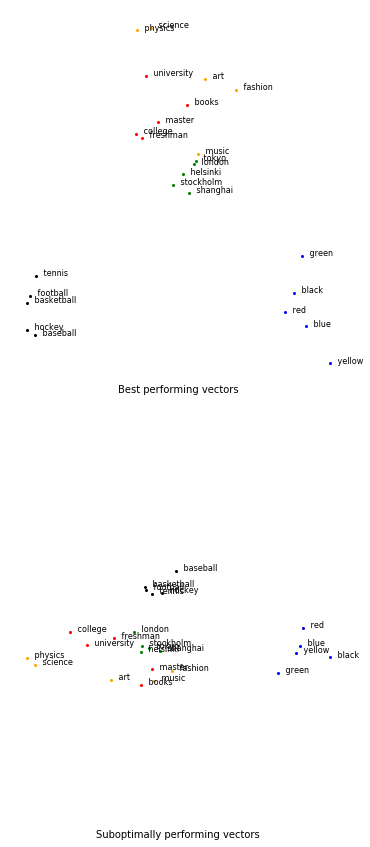

In [36]:
import matplotlib.pyplot as plt
import random

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,15), sharey=True)


ax1.set_xlabel("Best performing vectors", fontsize = 10)
ax1.set(frame_on=False)
plot_ax(good_vectors, ax1)

ax2.set_xlabel("Suboptimally performing vectors", fontsize = 10)
ax2.set(frame_on=False)
plot_ax(bad_vectors, ax2)
plt.setp([ax1,ax2], xticks=[], yticks=[])
plt.show()


In [40]:
import gensim
wv_good = gensim.models.KeyedVectors.load_word2vec_format('./vectors/'+good, binary=False)
wv_bad = gensim.models.KeyedVectors.load_word2vec_format('./vectors/'+bad, binary=False)

In [77]:
wv_good_max3 = gensim.models.KeyedVectors.load_word2vec_format('./vectors/'+good_max_3, binary=False)
wv_bad_max3 = gensim.models.KeyedVectors.load_word2vec_format('./vectors/'+bad_max_3, binary=False)

In [78]:
print("Goods")
for category in all_categories:
    print("Closest to",category[0],": ", wv_good_max3.most_similar(positive=[category[0]], topn=5), '\n')

print("Bads")
for category in all_categories:
    print("Closest to",category[0],": ", wv_bad_max3.most_similar(positive=[category[0]], topn=5), '\n')

Goods
Closest to university :  [('faculty', 0.5143542289733887), ('college', 0.5029286742210388), ('colleges', 0.5016030073165894), ('professors', 0.49622347950935364), ('students', 0.4837411046028137)] 

Closest to green :  [('lantern', 0.5290237665176392), ('oolong', 0.5217605829238892), ('stripe', 0.5142767429351807), ('overlay', 0.5029624700546265), ('blue', 0.4988698363304138)] 

Closest to hockey :  [('penguins', 0.5575616955757141), ('nhl', 0.5436614155769348), ('redwings', 0.525314450263977), ('playoff', 0.49945956468582153), ('canucks', 0.4988657534122467)] 

Closest to shanghai :  [('tedxshanghai', 0.5350767374038696), ('beijing', 0.5065641403198242), ('lufthansa', 0.48481065034866333), ('hk', 0.47775959968566895), ('qatar', 0.47705817222595215)] 

Closest to fashion :  [('philippine', 0.5192714929580688), ('fashiondelicious', 0.48909640312194824), ('depraved', 0.42844876646995544), ('tradeshow', 0.42723608016967773), ('snowboarder', 0.4203556180000305)] 

Bads
Closest to uni

In [75]:
vec = wv_good['usa']+wv_good['currency']
res = wv_good.most_similar([vec], topn=5)
print(res)

[('usa', 0.9362647533416748), ('currency', 0.6068704128265381), ('zombieville', 0.5660502910614014), ('countries', 0.5637125968933105), ('rotw', 0.5101402997970581)]
